In [1]:
import pandas as pd

In [2]:
df2020 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/train.csv')
df2019 = pd.read_csv('/home/ubuntu/workspace/vision.pjt/data/ISIC_2019_Training_GroundTruth.csv')

In [3]:
df2020

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [6]:
df2020.groupby('diagnosis').count()['image_name']

diagnosis
atypical melanocytic proliferation        1
cafe-au-lait macule                       1
lentigo NOS                              44
lichenoid keratosis                      37
melanoma                                584
nevus                                  5193
seborrheic keratosis                    135
solar lentigo                             7
unknown                               27124
Name: image_name, dtype: int64

In [4]:
df2019

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
img2019, diag2019 = list(), list()
for idx, row in df2019.iterrows():
    if row['MEL'] == 1.0:
        img2019.append(row['image'])
        diag2019.append('melanoma')
    elif row['NV'] == 1.0:
        img2019.append(row['image'])
        diag2019.append('nevus')
    elif row['BKL'] == 1.0:
        img2019.append(row['image'])
        diag2019.append('bkl')
    elif row['UNK'] == 1.0:
        img2019.append(row['image'])
        diag2019.append('unknown')

In [15]:
img2020, diag2020 = list(), list()
for idx, row in df2020.iterrows():
    diagnosis = row['diagnosis']
    if diagnosis == 'melanoma':
        img2020.append(row['image_name'])
        diag2020.append('melanoma')
    elif diagnosis == 'nevus':
        img2020.append(row['image_name'])
        diag2020.append('nevus')
    elif diagnosis in ['seborrheic keratosis', 'solar lentigo', 'lentigo NOS', 'lichenoid keratosis']:
        img2020.append(row['image_name'])
        diag2020.append('bkl')
    elif diagnosis in ['unknown', 'cafe-au-lait macule', 'atypical melanocytic proliferation']:
        img2020.append(row['image_name'])
        diag2020.append('unknown')

In [16]:
skin_combine = pd.DataFrame({'image_name': img2019+img2020, 'diagnosis':diag2019+diag2020})
skin_combine

,image_name,diagnosis
0,ISIC_0000000,nevus
1,ISIC_0000001,nevus
2,ISIC_0000002,melanoma
3,ISIC_0000003,nevus
4,ISIC_0000004,melanoma
...,...,...
53142,ISIC_9999134,unknown
53143,ISIC_9999320,unknown
53144,ISIC_9999515,unknown
53145,ISIC_9999666,unknown


In [29]:
cnt = skin_combine.groupby('diagnosis').count().reset_index()
cnt['percent'] = cnt['image_name'].map(lambda x: float(x/cnt['image_name'].sum()) * 100)
cnt

,diagnosis,image_name,percent
0,bkl,2847,5.356840
1,melanoma,5106,9.607316
2,nevus,18068,33.996274
3,unknown,27126,51.039569


In [30]:
skin_combine.to_csv('../skin_combine.csv', index=False)

In [4]:
skin_filter = pd.read_csv('../data/skin_filter.csv')

In [5]:
cnt = skin_filter.groupby('diagnosis').count().reset_index()
cnt['percent'] = cnt['image_name'].map(lambda x: float(x/cnt['image_name'].sum()) * 100)
cnt

,diagnosis,image_name,percent
0,bkl,2847,7.501383
1,melanoma,5106,13.453482
2,nevus,15000,39.522567
3,unknown,15000,39.522567


### Albumentation

In [2]:
import albumentations as A
import cv2
import random
import matplotlib.pyplot as plt

In [6]:
def get_skin_transforms(*, augment, img_size):
    transforms_train = A.Compose([
    A.SmallestMaxSize(max_size=img_size*2),
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.75),
    A.OneOf([
        A.MotionBlur(blur_limit=5),
        A.MedianBlur(blur_limit=5),
        A.GaussianBlur(blur_limit=5),
        A.GaussNoise(var_limit=(5.0, 30.0)),
    ], p=0.7),

    A.OneOf([
        A.OpticalDistortion(distort_limit=1.0),
        A.GridDistortion(num_steps=5, distort_limit=1.),
        A.ElasticTransform(alpha=3),
    ], p=0.7),

    A.CLAHE(clip_limit=4.0, p=0.7),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
    A.Resize(img_size, img_size),
    A.CoarseDropout(max_height=int(img_size * 0.375), max_width=int(img_size * 0.375), max_holes=1, p=0.7),    
    A.Normalize()
    ])

    transforms_val = A.Compose([
        A.Resize(img_size, img_size),
        A.Normalize()
    ])

    if augment == 'augment':
        return transforms_train
    else:
        return transforms_val

/home/ubuntu/anaconda3/envs/vision/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:1852: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  "blur_limit and sigma_limit minimum value can not be both equal to 0. "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


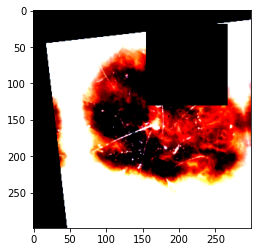

In [8]:
data_dir = '/home/ubuntu/workspace/vision.pjt/data/skin_images'
file_name = random.sample(skin_filter['image_name'].tolist(), 1)[0]
file_path = os.path.join(data_dir, f'{file_name}.jpg')

image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transform_fn = get_skin_transforms(augment='augment', img_size=299)
transformed = transform_fn(image=image)
transformed_image = transformed["image"]

plt.imshow(transformed_image)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
ipykernel_launcher:23: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


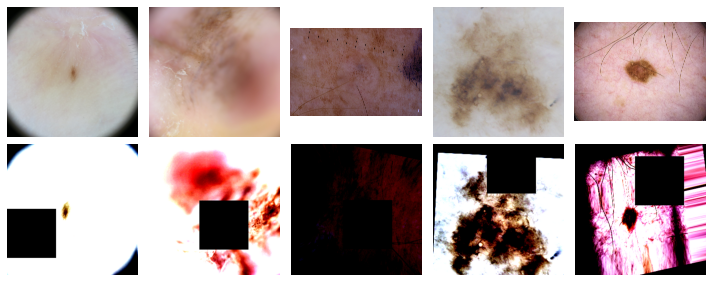

In [9]:
nrows = 2
ncols = 5
total = random.sample(skin_filter['image_name'].tolist(), 5)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    rowid = i // ncols
    colid = i % ncols
    if rowid == 0:
        file_path = os.path.join(data_dir, f'{total[i]}.jpg')
        image = cv2.imread(file_path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        file_path = os.path.join(data_dir, f'{total[i-5]}.jpg')
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Augment an image
        transform_fn = get_skin_transforms(augment='augment', img_size=299)
        transformed = transform_fn(image=image)
        img = transformed["image"]
    axi.axis('off')
    axi.imshow(img)
plt.axis('off')
plt.tight_layout(True)
plt.show()
#plt.savefig('hairy.png', dpi=300)

### Result

In [10]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

In [27]:
## no fc
in3_ce = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.skin/20210618-111133-inception_v3/result_inception_v3_skin.csv')
vit_ce = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.skin/20210614-003826-vit_base_patch16_224/result_vit_base_patch16_224_skin.csv')
pit_ce = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.skin/20210614-003928-pit_b_224/result_pit_b_224_skin.csv')

## fc
in3_fc = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.skin/20210618-111320-inception_v3/result_inception_v3_skin.csv')
vit_fc = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.skin/20210615-144536-vit_base_patch16_224/result_vit_base_patch16_224_skin.csv')
pit_fc = pd.read_csv('/home/ubuntu/workspace/vision.pjt/eval.skin/20210616-050315-pit_b_224/result_pit_b_224_skin.csv')

In [12]:
print(classification_report(in3_ce['true'], in3_ce['pred']))
print(multilabel_confusion_matrix(in3_ce['true'], in3_ce['pred']))

              precision    recall  f1-score   support

           0       0.41      0.07      0.12       570
           1       0.56      0.42      0.48      1021
           2       0.61      0.74      0.67      3000
           3       0.71      0.73      0.72      3000

    accuracy                           0.64      7591
   macro avg       0.57      0.49      0.50      7591
weighted avg       0.63      0.64      0.62      7591

[[[6960   61]
  [ 528   42]]

 [[6227  343]
  [ 593  428]]

 [[3167 1424]
  [ 773 2227]]

 [[3709  882]
  [ 816 2184]]]


In [13]:
print(classification_report(vit_ce['true'], vit_ce['pred']))
print(multilabel_confusion_matrix(vit_ce['true'], vit_ce['pred']))

              precision    recall  f1-score   support

           0       0.43      0.06      0.11       570
           1       0.65      0.25      0.36      1021
           2       0.54      0.88      0.67      3000
           3       0.79      0.59      0.67      3000

    accuracy                           0.62      7591
   macro avg       0.60      0.44      0.45      7591
weighted avg       0.65      0.62      0.59      7591

[[[6974   47]
  [ 534   36]]

 [[6431  139]
  [ 766  255]]

 [[2347 2244]
  [ 357 2643]]

 [[4121  470]
  [1243 1757]]]


In [14]:
print(classification_report(pit_ce['true'], pit_ce['pred']))
print(multilabel_confusion_matrix(pit_ce['true'], pit_ce['pred']))

              precision    recall  f1-score   support

           0       0.36      0.08      0.13       570
           1       0.45      0.48      0.47      1021
           2       0.56      0.84      0.67      3000
           3       0.84      0.53      0.65      3000

    accuracy                           0.61      7591
   macro avg       0.55      0.48      0.48      7591
weighted avg       0.64      0.61      0.60      7591

[[[6943   78]
  [ 526   44]]

 [[5966  604]
  [ 528  493]]

 [[2627 1964]
  [ 489 2511]]

 [[4289  302]
  [1405 1595]]]


In [15]:
print(classification_report(in3_fc['true'], in3_fc['pred']))
print(multilabel_confusion_matrix(in3_fc['true'], in3_fc['pred']))

              precision    recall  f1-score   support

           0       0.50      0.09      0.16       570
           1       0.56      0.39      0.46      1021
           2       0.60      0.72      0.66      3000
           3       0.70      0.74      0.72      3000

    accuracy                           0.64      7591
   macro avg       0.59      0.49      0.50      7591
weighted avg       0.63      0.64      0.62      7591

[[[6968   53]
  [ 516   54]]

 [[6252  318]
  [ 620  401]]

 [[3171 1420]
  [ 826 2174]]

 [[3644  947]
  [ 776 2224]]]


In [16]:
print(classification_report(vit_fc['true'], vit_fc['pred']))
print(multilabel_confusion_matrix(vit_fc['true'], vit_fc['pred']))

              precision    recall  f1-score   support

           0       0.38      0.03      0.06       570
           1       0.56      0.23      0.33      1021
           2       0.51      0.91      0.65      3000
           3       0.82      0.48      0.61      3000

    accuracy                           0.58      7591
   macro avg       0.57      0.41      0.41      7591
weighted avg       0.63      0.58      0.54      7591

[[[6990   31]
  [ 551   19]]

 [[6386  184]
  [ 785  236]]

 [[1938 2653]
  [ 278 2722]]

 [[4281  310]
  [1564 1436]]]


In [17]:
print(classification_report(pit_fc['true'], pit_fc['pred']))
print(multilabel_confusion_matrix(pit_fc['true'], pit_fc['pred']))

              precision    recall  f1-score   support

           0       0.42      0.09      0.15       570
           1       0.45      0.49      0.47      1021
           2       0.58      0.84      0.68      3000
           3       0.86      0.58      0.69      3000

    accuracy                           0.63      7591
   macro avg       0.58      0.50      0.50      7591
weighted avg       0.66      0.63      0.62      7591

[[[6948   73]
  [ 517   53]]

 [[5965  605]
  [ 524  497]]

 [[2758 1833]
  [ 491 2509]]

 [[4300  291]
  [1270 1730]]]


### Attention

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from torchvision import transforms
import cv2
import os
import sys
from timm.models import create_model
import pandas as pd
import random

In [12]:
activation = {}

def get_attn_softmax(name):
    def hook(model, input, output):
        with torch.no_grad():
            input = input[0]
            B, N, C = input.shape
            qkv = (
                model.qkv(input)
                .detach()
                .reshape(B, N, 3, model.num_heads, C // model.num_heads)
                .permute(2, 0, 3, 1, 4)
            )
            q, k, v = (
                qkv[0],
                qkv[1],
                qkv[2],
            )  # make torchscript happy (cannot use tensor as tuple)
            attn = (q @ k.transpose(-2, -1)) * model.scale
            attn = attn.softmax(dim=-1)
            activation[name] = attn

    return hook


# expects timm vis transformer model
def add_attn_vis_hook(model):
    for idx, module in enumerate(list(model.blocks.children())):
        module.attn.register_forward_hook(get_attn_softmax(f"attn{idx}"))



def get_mask(im,att_mat):
    # Average the attention weights across all heads.
    # att_mat,_ = torch.max(att_mat, dim=1)
    att_mat = torch.mean(att_mat, dim=1)

    # To account for residual connections, we add an identity matrix to the
    # attention matrix and re-normalize the weights.
    residual_att = torch.eye(att_mat.size(1))
    aug_att_mat = att_mat + residual_att
    aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

    # Recursively multiply the weight matrices
    joint_attentions = torch.zeros(aug_att_mat.size())
    joint_attentions[0] = aug_att_mat[0]

    for n in range(1, aug_att_mat.size(0)):
        joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])
        
    # Attention from the output token to the input space.
    v = joint_attentions[-1]
    grid_size = int(np.sqrt(aug_att_mat.size(-1)))
    mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
    mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
    result = (mask * im).astype("uint8")
    return result, joint_attentions, grid_size

def show_attention_map(model, img_path, shape):
    add_attn_vis_hook(model)
    im = Image.open(os.path.expandvars(img_path))
    im = im.resize((shape, shape))
    
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    logits = model(transform(im).unsqueeze(0))

    attn_weights_list = list(activation.values())

    result, joint_attentions, grid_size = get_mask(im,torch.cat(attn_weights_list))

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 6))
    ax1.axis('off')
    ax2.axis('off')
    ax1.set_title('Original')
    ax2.set_title('Attention Map')
    _ = ax1.imshow(im)
    _ = ax2.imshow(result)

    probs = torch.nn.Softmax(dim=-1)(logits)
    top5 = torch.argsort(probs, dim=-1, descending=True)
    print("Prediction Label and Attention Map!\n")
    for idx in top5[0, :5]:
        print(f'{probs[0, idx.item()]:.5f} : {idx.item()}', end='')
    
    i = len(joint_attentions) - 1
    v = joint_attentions[-1]
    
    # Attention from the output token to the input space.
    mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
    mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
    result = (mask * im).astype("uint8")

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 6))
    ax1.axis('off')
    ax2.axis('off')
    ax1.set_title('Original')
    ax2.set_title('Attention Map_%d Layer' % (i+1))
    _ = ax1.imshow(im)
    _ = ax2.imshow(result)
    plt.axis('off')
    plt.show()

In [17]:
model_name = 'vit_base_patch16_224'
shape = 224
initial_checkpoint = '/home/ubuntu/workspace/vision.pjt/output.aug.ce/20210613-151527-vit_base_patch16_224-224/model_best.pth.tar'
skin_filter = pd.read_csv('/home/ubuntu/workspace/vision.pjt/data/skin_filter.csv')
m = create_model(model_name, pretrained=True, checkpoint_path=initial_checkpoint, num_classes=4, in_chans=3)

Prediction Label and Attention Map!

0.51363 : 10.19507 : 00.15740 : 30.13390 : 2

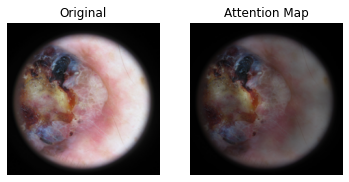

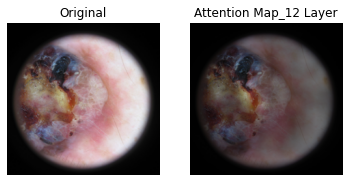

In [38]:
img_path = os.path.join('/home/ubuntu/workspace/vision.pjt/data/skin_images', 'ISIC_0068495.jpg')
show_attention_map(m, img_path=img_path, shape=shape)

In [37]:
# print(vit_ce[vit_ce['true'] == 0].sort_values(by='prob_0', ascending=False)['image_name'][:3])
# print(vit_ce[vit_ce['true'] == 0].sort_values(by='prob_0', ascending=False)['image_name'][-3:])
print(vit_ce[vit_ce['true']==1].sort_values(by='prob_1', ascending=False)['image_name'][:10])
print(vit_ce[vit_ce['true']==1].sort_values(by='prob_1', ascending=False)['image_name'][-3:])
# print(vit_ce[vit_ce['true'] == 2].sort_values(by='prob_2', ascending=False)['image_name'][:3])
# print(vit_ce[vit_ce['true'] == 2].sort_values(by='prob_2', ascending=False)['image_name'][-3:])
# print(vit_ce[vit_ce['true'] == 3].sort_values(by='prob_3', ascending=False)['image_name'][:3])
# print(vit_ce[vit_ce['true'] == 3].sort_values(by='prob_3', ascending=False)['image_name'][-3:])

2334    ISIC_0057299
2328    ISIC_0057251
3204    ISIC_0068527
3201    ISIC_0068495
3162    ISIC_0068115
2944    ISIC_0065728
2820    ISIC_0064113
2149    ISIC_0054982
2842    ISIC_0064483
2613    ISIC_0061112
Name: image_name, dtype: object
4229    ISIC_1866770
7039    ISIC_8702237
6204    ISIC_6713432
Name: image_name, dtype: object


In [10]:
print(vit_fc[vit_fc['true'] == 0].sort_values(by='prob_0', ascending=False)['image_name'][:3])
print(vit_fc[vit_fc['true'] == 0].sort_values(by='prob_0', ascending=False)['image_name'][-3:])
print(vit_fc[vit_fc['true'] == 1].sort_values(by='prob_1', ascending=False)['image_name'][:3])
print(vit_fc[vit_fc['true'] == 1].sort_values(by='prob_1', ascending=False)['image_name'][-3:])
print(vit_fc[vit_fc['true'] == 2].sort_values(by='prob_2', ascending=False)['image_name'][:3])
print(vit_fc[vit_fc['true'] == 2].sort_values(by='prob_2', ascending=False)['image_name'][-3:])
print(vit_fc[vit_fc['true'] == 3].sort_values(by='prob_3', ascending=False)['image_name'][:3])
print(vit_fc[vit_fc['true'] == 3].sort_values(by='prob_3', ascending=False)['image_name'][-3:])

681     ISIC_0025656
2038    ISIC_0053661
2081    ISIC_0054219
Name: image_name, dtype: object
1698    ISIC_0032113
4673    ISIC_2970409
3568    ISIC_0171983
Name: image_name, dtype: object
2334    ISIC_0057299
2219    ISIC_0055899
3222    ISIC_0068769
Name: image_name, dtype: object
328     ISIC_0013500_downsampled
4820                ISIC_3408231
7543                ISIC_9870885
Name: image_name, dtype: object
3559    ISIC_0105145
911     ISIC_0027061
4333    ISIC_2100640
Name: image_name, dtype: object
5314    ISIC_4636434
7411    ISIC_9546061
183     ISIC_0011120
Name: image_name, dtype: object
3729    ISIC_0580054
4614    ISIC_2828001
6219    ISIC_6754684
Name: image_name, dtype: object
6857    ISIC_8252358
6343    ISIC_7073459
4680    ISIC_2984737
Name: image_name, dtype: object


In [11]:
print(pit_ce[pit_ce['true'] == 0].sort_values(by='prob_0', ascending=False)['image_name'][:3])
print(pit_ce[pit_ce['true'] == 0].sort_values(by='prob_0', ascending=False)['image_name'][-3:])
print(pit_ce[pit_ce['true'] == 1].sort_values(by='prob_1', ascending=False)['image_name'][:3])
print(pit_ce[pit_ce['true'] == 1].sort_values(by='prob_1', ascending=False)['image_name'][-3:])
print(pit_ce[pit_ce['true'] == 2].sort_values(by='prob_2', ascending=False)['image_name'][:3])
print(pit_ce[pit_ce['true'] == 2].sort_values(by='prob_2', ascending=False)['image_name'][-3:])
print(pit_ce[pit_ce['true'] == 3].sort_values(by='prob_3', ascending=False)['image_name'][:3])
print(pit_ce[pit_ce['true'] == 3].sort_values(by='prob_3', ascending=False)['image_name'][-3:])

2589    ISIC_0060833
637     ISIC_0025339
4197    ISIC_1750424
Name: image_name, dtype: object
6307    ISIC_6974497
1698    ISIC_0032113
7110    ISIC_8851901
Name: image_name, dtype: object
2807    ISIC_0064010
3371    ISIC_0070596
2853    ISIC_0064575
Name: image_name, dtype: object
385     ISIC_0014190_downsampled
7170                ISIC_9000234
3642                ISIC_0337631
Name: image_name, dtype: object
1612    ISIC_0031509
732     ISIC_0025991
7323    ISIC_9355890
Name: image_name, dtype: object
4892    ISIC_3594764
5895    ISIC_6018905
3274    ISIC_0069351
Name: image_name, dtype: object
6218    ISIC_6749335
5844    ISIC_5917605
4970    ISIC_3770380
Name: image_name, dtype: object
6839    ISIC_8218058
6371    ISIC_7143388
4608    ISIC_2818465
Name: image_name, dtype: object


In [12]:
print(pit_fc[pit_fc['true'] == 0].sort_values(by='prob_0', ascending=False)['image_name'][:3])
print(pit_fc[pit_fc['true'] == 0].sort_values(by='prob_0', ascending=False)['image_name'][-3:])
print(pit_fc[pit_fc['true'] == 1].sort_values(by='prob_1', ascending=False)['image_name'][:3])
print(pit_fc[pit_fc['true'] == 1].sort_values(by='prob_1', ascending=False)['image_name'][-3:])
print(pit_fc[pit_fc['true'] == 2].sort_values(by='prob_2', ascending=False)['image_name'][:3])
print(pit_fc[pit_fc['true'] == 2].sort_values(by='prob_2', ascending=False)['image_name'][-3:])
print(pit_fc[pit_fc['true'] == 3].sort_values(by='prob_3', ascending=False)['image_name'][:3])
print(pit_fc[pit_fc['true'] == 3].sort_values(by='prob_3', ascending=False)['image_name'][-3:])

3279    ISIC_0069406
1772    ISIC_0032688
3284    ISIC_0069478
Name: image_name, dtype: object
1854    ISIC_0033246
874     ISIC_0026843
1321    ISIC_0029617
Name: image_name, dtype: object
3512    ISIC_0072653
2360    ISIC_0057668
2807    ISIC_0064010
Name: image_name, dtype: object
5779    ISIC_5747942
4281    ISIC_1975042
4705    ISIC_3065032
Name: image_name, dtype: object
7312    ISIC_9333245
1670    ISIC_0031898
4337    ISIC_2108457
Name: image_name, dtype: object
2472    ISIC_0059095
2031    ISIC_0053574
6477    ISIC_7388369
Name: image_name, dtype: object
4620    ISIC_2832584
5217    ISIC_4422302
6007    ISIC_6257422
Name: image_name, dtype: object
5218    ISIC_4422476
5229    ISIC_4453489
3951    ISIC_1165548
Name: image_name, dtype: object
